# Understanding the Demographics & Influence of Technica

### By Raghav Chetal and Sofia Fernandez-Poyatos

<p> Computer Science has always been a generally male-dominated career, with only 18% of all computer scientists being women and 20% of Computer Science students being women at University of Maryland. </p>

![](technica_cover.jpg)

## Our Motivation

[Technica](https://gotechnica.org) is the world's largest all-women and nonbinary hackathon, hosted annually at the University of Maryland. Since its inception in 2015, Technica has been putting a spotlight on women in the computer science workplace and empowering them to succeed. 
<br><br>
We've both been involved with Technica's organization through director and mentor positions. We are interested in understanding Technica's influence in different age groups, studies and states.
<br><br>
We received permission from the Technica organizing team to use several participant registration datasets. In this tutorial, we will focus on 2018's registration data, because it is the most completed. 

This dataset includes information such as:
<br>
* Age
* Major
* School
* Background/Ethnicity
* Gender
* State
* Institution/University
* Retention Rate

## Required Libraries¶
Here are the libraries we used for our tutorial and how we used them:
<br>
* _pandas_ : a data analysis toolkit which makes storing and accessing data easier
* _numpy_ : a package for mathematical computing
* _seaborns_ : creating graphs (pie charts, bar charts, etc.)
* _re_ : using regex to select preferred word
* _beautifulsoup4_ : to scrape web for coordinates of states to plot on map
* _requests_ : to access url page to scrape for bs4
* _folium_ : creating map visualizations of hackers
* _sklearn_ : making regressions and doing statistical analysis

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import sklearn
import matplotlib
import re
from bs4 import BeautifulSoup
import requests

matplotlib.style.use("ggplot")

# data2 = pd.read_csv("technica_data_2019.csv")
data = pd.read_csv("technica_data_2018.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 21 columns):
Age                       2224 non-null int64
Birthday                  2224 non-null object
Gender Identity           2221 non-null object
Backgrounds               2220 non-null object
School Level              2217 non-null object
Graduation Year           2216 non-null object
First Hackathon?          2220 non-null object
First Technica?           2220 non-null object
Location                  2220 non-null object
Institution               1835 non-null object
Preferred Pronouns        2219 non-null object
Food Restrictions         2220 non-null object
University                227 non-null object
Major                     1830 non-null object
Unnamed: 14               0 non-null float64
State                     1850 non-null object
Country (non-USA)         35 non-null object
Tech + Research Track?    745 non-null object
Unnamed: 18               0 non-null float64
Unnamed: 

## Data Curation
Before uploading the CSV files we removed any private data (i.e. participants name, email and t-shirt size). Here we will remove any unecessary data (food restrictions, pronouns, tokens, and unnamed columns) that do not contribute to our analysis 

In [54]:
# data.drop(['Food Restrictions')
clean_data = data.drop(['Preferred Pronouns', 'Food Restrictions','Unnamed: 14','Unnamed: 18',
                        'Unnamed: 19','Unnamed: 20', 'University'], axis = 'columns')
clean_data

,Age,Birthday,Gender Identity,Backgrounds,School Level,Graduation Year,First Hackathon?,First Technica?,Location,Institution,Major,State,Country (non-USA),Tech + Research Track?
0,22,5/18/96,Female,Hispanic or Latino,College (Undergraduate),2019,True,True,Olney,University of Maryland College Park,Environmental Science and Technology,Maryland,NaN,True
1,17,5/15/01,Female,Asian / Pacific Islander,High School,2019,True,True,Ellicott City,NaN,NaN,Maryland,NaN,False
2,21,10/25/97,Female,Prefer not to answer,College (Undergraduate),2020,False,True,Gaithersburg,University of Maryland College Park,Computer Science,Maryland,NaN,False
3,20,9/22/98,Female,Asian / Pacific Islander,College (Undergraduate),2021,True,True,College Park,University of Maryland College Park,Mechanical Engineering,Maryland,NaN,True
4,20,3/12/98,Female,Asian / Pacific Islander,College (Undergraduate),2020,False,True,College Park,University of Maryland College Park,Bioengineering,Maryland,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,16,1/17/02,Female,Asian / Pacific Islander,High School,2020,False,False,"Rockville, MD",NaN,NaN,NaN,NaN,NaN
2220,16,1/1/02,Female,White/Caucasian,High School,2020,True,True,"Columbia, MD",NaN,NaN,NaN,NaN,NaN
2221,20,11/10/98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2222,23,12/29/94,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## General Understand of User Data
We are going to create several graphs in order to have an understanding of what kinds of participants attend Technica.
<br> <br>
First we will take a look at what kind of age range of people are registered and interest in Technica using a bargraph and take a look at what kinds of majors as well as what kinds of majors are registering through a bar graph.



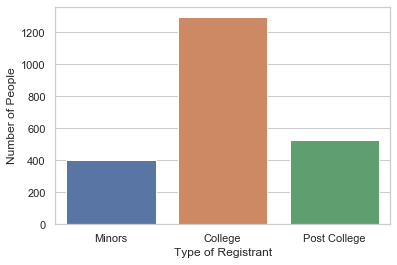

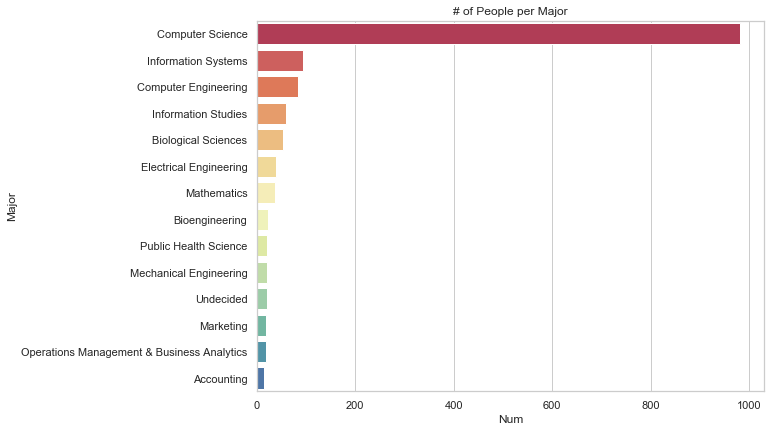

In [147]:
#majors
my_plot = sns.barplot(x, y);
my_plot.set(xlabel ='Type of Registrant', ylabel = 'Number of People') 
plt.show()
    
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

sns.set(style="whitegrid")
plt.figure(2, figsize=(20,15))
the_grid = GridSpec(2, 2)

plt.subplot(the_grid[0, 1],  title='# of People per Major')
sns.barplot(x='Num',y='Major', data=major_clean, palette='Spectral')

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

sns.set(style="whitegrid")
#s

plt.figure(2, figsize=(20,15))
the_grid = GridSpec(2, 2)

plt.subplot(the_grid[0, 1],  title='# of People per Major')
sns.barplot(x='Num',y='Major', data=major_clean, palette='Spectral')

In [ ]:

# Removes invalid answers, surveys were self-fill, so there is some invalid data
occurrences = data['Gender Identity'].value_counts()[0:2]

# Creates a Pie Chart of the Gender Identity data
plt.figure(figsize = (24, 18))
occurrences.plot.pie(y=occurrences.index,
           shadow=False,
           colors=colors, 
           explode=(0, 0.1),
           startangle=90,
           autopct='%1.1f%%',
        textprops={'fontsize': 24})

plt.axis('equal')
plt.title('Gender Distribution', fontsize = 30)
plt.show()

In [ ]:
# Removes invalid answers, surveys were self-fill (Remove ages under 5)
age_fix = data[data['Age'] > 5]

# Plot the Barplot
plt.figure(figsize = (24, 18))
occurrences = age_fix['Age'].value_counts()
ax = sns.barplot(x=occurrences.keys(), y=occurrences.values, data=data)
plt.title('Age vs. Number of Attendants', fontsize = 30)
plt.ylabel('Number of Attendants', fontsize = 26)
plt.xlabel('Age', fontsize = 26)
plt.show()

## Map of Hackers in the USA

In [87]:
save_states = clean_data['State'].dropna().value_counts()
save_states

Maryland          963
New York          190
Virginia          189
Pennsylvania      100
New Jersey         77
Other              71
North Carolina     38
Massachusetts      31
California         28
Indiana            25
Florida            23
Texas              16
Washington         13
Georgia            12
Illinois           11
Ohio                7
Michigan            7
West Virginia       6
Delaware            5
Tennessee           5
Wisconsin           5
Rhode Island        5
Utah                4
Louisiana           3
Kentucky            3
South Carolina      3
Alabama             3
Iowa                2
Connecticut         2
Minnesota           1
Arizona             1
Alaska              1
Name: State, dtype: int64

In [118]:
page_info = requests.get("https://www.latlong.net/category/states-236-14.html")
soup_info = BeautifulSoup(page_info.text)

map_coordinates = soup_info.find(class_='col-8')
coordinates = map_coordinates.find_all('td')

our_state_list = ['Maryland','New York','Virginia', 'Pennsylvania','New Jersey','North Carolina','Massachusetts'
             'California', 'Indiana', 'Florida', 'Texas', 'Washington', 'Georgia', 'Illinois', 'Ohio',
             'Michigan','West Virginia', 'Delaware', 'Tennessee', 'Wisconsin', 'Rhode Island', 'Utah', 
             'Louisiana', 'Kentucky', 'South Carolina', 'Alabama', 'Iowa', 'Connecticut', 'Minnesota',
             'Arizona', 'Alaska']
fresh_state_list = []
lat_list = []
lon_list = []

count = 1
# for coord in coordinates:
for i in range(0,len(coordinates)-1,3):
    #parsing for state name
    info = str(coordinates[i].contents)
        
    find_state = re.findall(r'title="\w+,|title="\w+\s\w+,', info)

    find_state = find_state[0].replace("title=\"", "")
    find_state = find_state[:-1]
    
    if find_state in our_state_list:
        fresh_state_list.append(find_state)
        lon_list.append(coordinates[i+1].contents[0])
        lat_list.append(coordinates[i+2].contents[0])

map_data = pd.DataFrame({
    'name':fresh_state_list,
    'lat':lat_list,
    'lon':lon_list,
})

map_data


,name,lat,lon
0,Wisconsin,-89.500000,44.500000
1,West Virginia,-80.500000,39.000000
2,Texas,-100.000000,31.000000
3,Rhode Island,-71.500000,41.700001
4,New York,-75.000000,43.000000
5,Illinois,-89.000000,40.000000
6,Delaware,-75.500000,39.000000
7,Connecticut,-72.699997,41.599998
8,Indiana,-86.126976,40.273502
9,Florida,-81.760254,27.994402


In [160]:
map = folium.Map(location=[30, -90], zoom_start=4)

for i in range(0,len(map_data)):
    folium.Marker([map_data.iloc[i]['lon'], map_data.iloc[i]['lat']], popup=map_data.iloc[i]['name']).add_to(map)

map

In [139]:
#major bar graphs
majors = clean_data['Major'].dropna().value_counts()
majors.head(100)

major_df = pd.DataFrame(majors)
major_df = major_df.reset_index()
major_df.columns = ['Major', 'Num'] # change column names
major_clean = major_df.head(14)


In [ ]:
#majors